## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94781440/94765736 [==============================] - 5s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
import glob
import os
folders =os.listdir('Datasets/Train')
#folders = glob.glob('content/Datasets/Train/')


In [8]:
folders

['audi', 'lamborghini', 'mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - ETA: 0s - loss: 5.3854 - accuracy: 0.3125WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000022558F1F8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

2/2 [==============================] - 8s 6s/step - loss: 0.2727 - accuracy: 0.9375 - val_loss: 0.9330 - val_accuracy: 0.6897
Epoch 47/50
2/2 [==============================] - 8s 6s/step - loss: 0.2318 - accuracy: 0.9688 - val_loss: 0.8768 - val_accuracy: 0.7414
Epoch 48/50
2/2 [==============================] - 8s 6s/step - loss: 0.1982 - accuracy: 0.9844 - val_loss: 0.8720 - val_accuracy: 0.7241
Epoch 49/50
2/2 [==============================] - 9s 6s/step - loss: 0.2211 - accuracy: 0.9375 - val_loss: 0.9244 - val_accuracy: 0.6897
Epoch 50/50
2/2 [==============================] - 8s 6s/step - loss: 0.2357 - accuracy: 0.9375 - val_loss: 0.8657 - val_accuracy: 0.7931


In [18]:
r.history

{'loss': [5.385378360748291,
  5.450667381286621,
  2.8630526065826416,
  3.927107810974121,
  3.3369052410125732,
  2.396145820617676,
  1.5264537334442139,
  2.342862129211426,
  1.1905937194824219,
  1.3294677734375,
  0.9267241954803467,
  1.0891234874725342,
  0.7384387850761414,
  0.9534600973129272,
  0.6447566151618958,
  0.8613297343254089,
  0.6961497068405151,
  0.8890484571456909,
  0.6293468475341797,
  0.6031104922294617,
  0.6051440238952637,
  0.5768980979919434,
  0.4660639762878418,
  0.4583447575569153,
  0.45348045229911804,
  0.4501885771751404,
  0.5043644905090332,
  0.4061763882637024,
  0.3690599799156189,
  0.37009263038635254,
  0.3176145851612091,
  0.40210652351379395,
  0.32185453176498413,
  0.37986019253730774,
  0.2545817494392395,
  0.3021549582481384,
  0.32676708698272705,
  0.3740200996398926,
  0.257333904504776,
  0.333455890417099,
  0.18725645542144775,
  0.26017677783966064,
  0.1886940598487854,
  0.2329016774892807,
  0.2336643934249878,
  0.

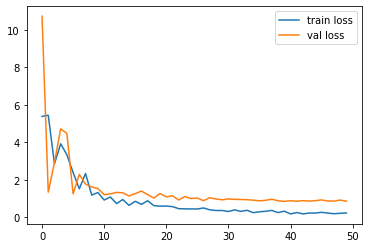

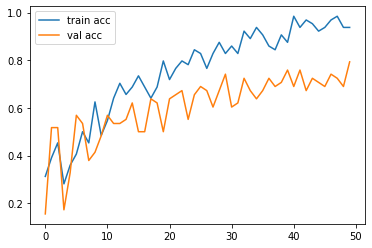

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[4.41432791e-03, 9.68428969e-01, 2.71567199e-02],
       [2.25271983e-03, 9.74755466e-01, 2.29917541e-02],
       [7.02306349e-03, 8.42336118e-01, 1.50640771e-01],
       [4.89216857e-02, 4.31200713e-02, 9.07958210e-01],
       [1.03014798e-04, 9.96878147e-01, 3.01877060e-03],
       [1.47549752e-02, 8.89824927e-01, 9.54201296e-02],
       [1.29741505e-01, 6.13563240e-01, 2.56695271e-01],
       [2.65371334e-03, 6.34160221e-01, 3.63186061e-01],
       [3.79175097e-02, 5.87497473e-01, 3.74585003e-01],
       [2.38747466e-02, 3.82833213e-01, 5.93292117e-01],
       [1.14953294e-02, 7.46285021e-01, 2.42219612e-01],
       [1.12638017e-02, 7.87460566e-01, 2.01275602e-01],
       [5.55590570e-01, 3.79871011e-01, 6.45384938e-02],
       [1.31581081e-02, 6.47527337e-01, 3.39314520e-01],
       [3.80915636e-03, 7.64907449e-02, 9.19700146e-01],
       [3.92431058e-02, 1.90824449e-01, 7.69932449e-01],
       [5.89331670e-04, 9.94520545e-01, 4.89008985e-03],
       [4.81961556e-02, 9.35603

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_resnet50.h5')

In [34]:
img_data

NameError: name 'img_data' is not defined

In [35]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [36]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [37]:
x.shape

(224, 224, 3)

In [38]:
x=x/255

In [39]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
model.predict(img_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.18246865, 0.03812038, 0.7794109 ]], dtype=float32)

In [41]:
a=np.argmax(model.predict(img_data), axis=1)

In [42]:
a

array([2], dtype=int64)